# Merging, Joining, and Concatenating

There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating. In this lecture we will discuss these 3 methods with examples.

____

# <u>Example DataFrames.

First off we're going to create some example DataFrames to work with.

In [4]:
import pandas as pd

In [5]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

In [6]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7]) 

In [7]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

In [8]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [9]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [10]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


---

## Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. We can use **pd.concat** and pass in a list of DataFrames to concatenate together.

Syntax: pd.concat([DataFrame1, DataFrame2, DataFrame_n], axis = 0)

In [13]:
# axis = 0
# Concatenating on rows.

pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [14]:
# Concatenating on columns.

pd.concat([df1,df2,df3], axis = 1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


---

# <u>Example DataFrames.

In [17]:
# key column is exactly the same in left and right DataFrames.

left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})    

In [18]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [19]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


# <u>Merging.

The **merge** function allows us to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

### INNER JOIN in SQL.

An INNER JOIN statement will result with the set of records that match in both the tables.

Syntax:

    SELECT * FROM TableA
    INNER JOIN TableB
    ON TableA.col_match = TableB.col_match

    OR

    SELECT * FROM TableB
    INNER JOIN TableA
    ON TableA.col_match = TableB.col_match

    Returns a Symmetrical Venn Diagram.

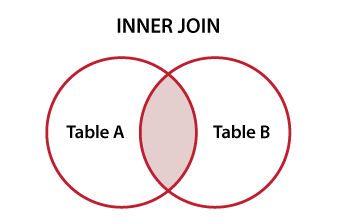

### Merge Syntax:

    pd.merge(dataframe_left, dataframe_right, how = 'inner', on = 'matching_col')

    default merge: 'inner'

In [23]:
pd.merge(left, right, how = 'inner', on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


- <u>NOTE:

    - After merging with inner we get rows that were common in both the DataFrames based on the key column.

### Or to show a more complicated example:

In [26]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [27]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [28]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [29]:
# INNER JOIN.
# Pass in a list of keys if we want to merge on multiple keys.

pd.merge(left, right, on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


- <u>NOTE:

    - After merging with inner we get rows that were common in both the DataFrames based on the key1 and key2 column.

### OUTER JOIN in SQL.

FULL OUTER JOIN statement essentially grabs everything, weather it's present in both tables or present only in one table.

Syntax:

    SELECT * FROM TableA
    FULL OUTER JOIN TableB
    ON TableA.col_match = TableB.col_match

    OR

    SELECT * FROM TableB
    FULL OUTER JOIN TableA
    ON TableA.col_match = TableB.col_match

    Returns a Symmetrical Venn Diagram.

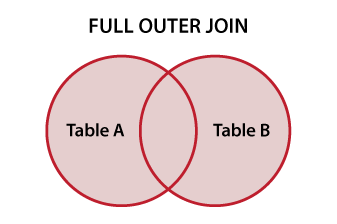

In [32]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [33]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [34]:
pd.merge(left, right, how = 'outer', on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


### LEFT JOIN in SQL.

A LEFT OUTER JOIN statement will result in the set of records that are in the left table, if there is no match with the right table, the results are null.

Syntax:

    SELECT * FROM TableA
    LEFT OUTER JOIN TableB
    ON TableA.col_match = TableB.col_match

    OR

    SELECT * FROM TableA
    LEFT JOIN TableB
    ON TableA.col_match = TableB.col_match

    Order actually matters.
    Returns an Asymmetrical Venn Diagram.

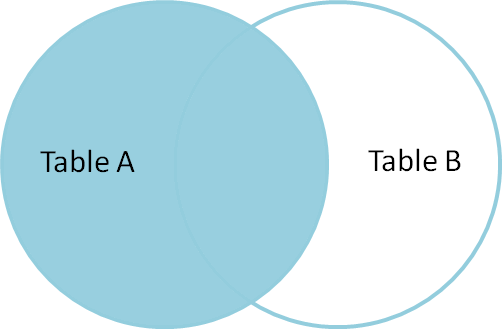

In [36]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [37]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [38]:
pd.merge(left, right, how = 'left', on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


### RIGHT JOIN in SQL.

A RIGHT OUTER JOIN statement will result in the set of records that are in the right table, if there is no match with the left table, the results are null.

Syntax:

    SELECT * FROM TableA
    RIGHT OUTER JOIN TableB
    ON TableA.col_match = TableB.col_match

    OR

    SELECT * FROM TableA
    RIGHT JOIN TableB
    ON TableA.col_match = TableB.col_match

    Order actually matters.
    Returns a Asymmetrical Venn Diagram.

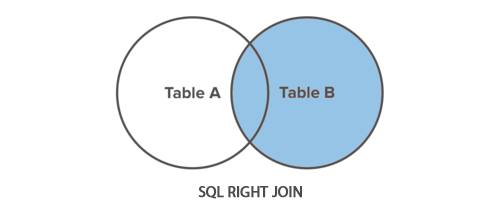

In [40]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [41]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [42]:
pd.merge(left, right, how = 'right', on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


---

# <u>Joining.

Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

**We could essentially think of this as the same thing as merge except the keys we want to join on are actually on our <u>index instead of a column.**

Syntax:

    df1.join(df2, how)

In [45]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [46]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [47]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [48]:
# Similar to left join.

left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [49]:
# Similar to left join.

left.join(right, how = 'left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [50]:
# Similar to right join.

right.join(left)

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


In [51]:
# Similar to right join.

left.join(right, how = 'right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [52]:
# Outer Join.

left.join(right, how = 'outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [53]:
# Inner Join.

left.join(right, how = 'inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [93]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [95]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [54]:
left.join(right, how = 'cross')

,A,B,C,D
0,A0,B0,C0,D0
1,A0,B0,C2,D2
2,A0,B0,C3,D3
3,A1,B1,C0,D0
4,A1,B1,C2,D2
5,A1,B1,C3,D3
6,A2,B2,C0,D0
7,A2,B2,C2,D2
8,A2,B2,C3,D3


---